In [99]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



{'status': {'timestamp': '2024-08-12T13:02:24.463Z', 'error_code': 0, 'error_message': None, 'elapsed': 10, 'credit_count': 1, 'notice': None, 'total_count': 10036}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11631, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [100]:
type(data)

dict

In [101]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [102]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738906.00000,19738906.00000,False,NaN,1,NaN,NaN,None,2024-08-12T13:00:00.000Z,59745.19289,30351592986.45466,83.56420,-0.24208,-1.27285,19.93807,1.63404,-11.79114,-2.93280,1179304746439.57959,55.99170,1254649050724.05005,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:32.109813
1,1027,Ethereum,ETH,ethereum,9205,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120270277.79627,120270277.79627,True,NaN,2,NaN,NaN,None,2024-08-12T13:00:00.000Z,2685.40330,17276711112.21418,66.95020,0.41128,1.76889,20.48938,-14.96452,-23.11397,-7.19115,322974200561.10046,15.33750,322974200561.09998,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:32.109813
2,825,Tether USDt,USDT,tether,93964,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.54697,117068077122.29233,True,NaN,3,NaN,NaN,None,2024-08-12T13:00:00.000Z,1.00045,53769539114.02662,64.61240,0.00186,0.01365,0.04625,0.02983,0.04999,0.08387,115690675455.95839,5.49790,117120837996.74001,None,2024-08-12T13:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 13:02:32.109813
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936509.25074,145936509.25074,False,NaN,4,NaN,NaN,None,2024-08-12T13:00:00.000Z,517.04789,1703116366.10766,15.65910,-0.14617,-1.02296,25.10105,-3.68268,-14.56041,-11.16245,75456164887.75055,3.58590,75456164887.75000,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:32.109813
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466732281.10631,582109114.90923,True,NaN,5,NaN,NaN,None,2024-08-12T13:00:00.000Z,149.04686,3312793933.15151,119.78670,-1.06837,-1.70003,33.03974,6.17140,-0.52676,1.58596,69564982888.20204,3.30280,86761538160.03999,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:32.109813
5,3408,USDC,USDC,usd-coin,21472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34504057202.27536,34504057202.27536,False,NaN,6,NaN,NaN,None,2024-08-12T13:00:00.000Z,1.00008,6191891443.32336,111.71080,0.01201,0.00577,0.01134,0.00763,0.01406,-0.00854,34506909825.75625,1.63980,34506909825.76000,None,2024-08-12T13:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 13:02:32.109813
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-12T13:01:00.000Z,0.57611,1483791018.28749,38.25090,-0.09464,0.04104,30.73348,12.28274,18.42712,14.21223,32322012493.86841,1.53600,57610516676.55000,None,2024-08-12T13:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:32.109813
7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2516599183.98833,5108477936.98460,True,NaN,8,3414166606.00000,22581776582.52630,None,2024-08-12T13:00:00.000Z,6.61414,430191161.36853,74.80830,1.03309,2.85869,32.95548,-10.02631,-11.85131,-1.42700,16645139818.52016,0.79050,33788189260.31000,None,2024-08

In [103]:

import pandas as pd
import json
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from time import sleep

# Initialize the global DataFrame
df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',  # Replace with your actual API key
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)

        # Normalize JSON data into a DataFrame
        df2 = pd.json_normalize(data['data'])
        df2['Timestamp'] = pd.to_datetime('now')

        # Append the new data to the global DataFrame using pd.concat()
        df = pd.concat([df, df2], ignore_index=True)

        # Save DataFrame to a CSV file (optional)
        # Uncomment and adjust the file path if you want to save the data
        # if not os.path.isfile('API.csv'):
        #     df.to_csv('API.csv', header='column_names', index=False)
        # else:
        #     df.to_csv('API.csv', mode='a', header=False, index=False)

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)


In [104]:
import os
# Loop to call the API multiple times
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)  # Sleep for 1 minute

# Exit or complete script
exit()

API Runner completed


KeyboardInterrupt: 

In [105]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738906.00000,19738906.00000,False,NaN,1,NaN,NaN,None,2024-08-12T13:00:00.000Z,59745.19289,30351592986.45466,83.56420,-0.24208,-1.27285,19.93807,1.63404,-11.79114,-2.93280,1179304746439.57959,55.99170,1254649050724.05005,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
1,1027,Ethereum,ETH,ethereum,9205,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120270277.79627,120270277.79627,True,NaN,2,NaN,NaN,None,2024-08-12T13:00:00.000Z,2685.40330,17276711112.21418,66.95020,0.41128,1.76889,20.48938,-14.96452,-23.11397,-7.19115,322974200561.10046,15.33750,322974200561.09998,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
2,825,Tether USDt,USDT,tether,93964,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.54697,117068077122.29233,True,NaN,3,NaN,NaN,None,2024-08-12T13:00:00.000Z,1.00045,53769539114.02662,64.61240,0.00186,0.01365,0.04625,0.02983,0.04999,0.08387,115690675455.95839,5.49790,117120837996.74001,None,2024-08-12T13:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 13:02:42.728402
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936509.25074,145936509.25074,False,NaN,4,NaN,NaN,None,2024-08-12T13:00:00.000Z,517.04789,1703116366.10766,15.65910,-0.14617,-1.02296,25.10105,-3.68268,-14.56041,-11.16245,75456164887.75055,3.58590,75456164887.75000,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466732281.10631,582109114.90923,True,NaN,5,NaN,NaN,None,2024-08-12T13:00:00.000Z,149.04686,3312793933.15151,119.78670,-1.06837,-1.70003,33.03974,6.17140,-0.52676,1.58596,69564982888.20204,3.30280,86761538160.03999,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
5,3408,USDC,USDC,usd-coin,21472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34504057202.27536,34504057202.27536,False,NaN,6,NaN,NaN,None,2024-08-12T13:00:00.000Z,1.00008,6191891443.32336,111.71080,0.01201,0.00577,0.01134,0.00763,0.01406,-0.00854,34506909825.75625,1.63980,34506909825.76000,None,2024-08-12T13:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 13:02:42.728402
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-12T13:01:00.000Z,0.57611,1483791018.28749,38.25090,-0.09464,0.04104,30.73348,12.28274,18.42712,14.21223,32322012493.86841,1.53600,57610516676.55000,None,2024-08-12T13:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2516599183.98833,5108477936.98460,True,NaN,8,3414166606.00000,22581776582.52630,None,2024-08-12T13:00:00.000Z,6.61414,430191161.36853,74.80830,1.03309,2.85869,32.95548,-10.02631,-11.85131,-1.42700,16645139818.52016,0.79050,33788189260.31000,None,2024-08

In [106]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [107]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738906.00000,19738906.00000,False,NaN,1,NaN,NaN,None,2024-08-12T13:00:00.000Z,59745.19289,30351592986.45466,83.56420,-0.24208,-1.27285,19.93807,1.63404,-11.79114,-2.93280,1179304746439.57959,55.99170,1254649050724.05005,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
1,1027,Ethereum,ETH,ethereum,9205,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120270277.79627,120270277.79627,True,NaN,2,NaN,NaN,None,2024-08-12T13:00:00.000Z,2685.40330,17276711112.21418,66.95020,0.41128,1.76889,20.48938,-14.96452,-23.11397,-7.19115,322974200561.10046,15.33750,322974200561.09998,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
2,825,Tether USDt,USDT,tether,93964,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.54697,117068077122.29233,True,NaN,3,NaN,NaN,None,2024-08-12T13:00:00.000Z,1.00045,53769539114.02662,64.61240,0.00186,0.01365,0.04625,0.02983,0.04999,0.08387,115690675455.95839,5.49790,117120837996.74001,None,2024-08-12T13:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 13:02:42.728402
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936509.25074,145936509.25074,False,NaN,4,NaN,NaN,None,2024-08-12T13:00:00.000Z,517.04789,1703116366.10766,15.65910,-0.14617,-1.02296,25.10105,-3.68268,-14.56041,-11.16245,75456164887.75055,3.58590,75456164887.75000,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466732281.10631,582109114.90923,True,NaN,5,NaN,NaN,None,2024-08-12T13:00:00.000Z,149.04686,3312793933.15151,119.78670,-1.06837,-1.70003,33.03974,6.17140,-0.52676,1.58596,69564982888.20204,3.30280,86761538160.03999,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
5,3408,USDC,USDC,usd-coin,21472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34504057202.27536,34504057202.27536,False,NaN,6,NaN,NaN,None,2024-08-12T13:00:00.000Z,1.00008,6191891443.32336,111.71080,0.01201,0.00577,0.01134,0.00763,0.01406,-0.00854,34506909825.75625,1.63980,34506909825.76000,None,2024-08-12T13:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 13:02:42.728402
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-12T13:01:00.000Z,0.57611,1483791018.28749,38.25090,-0.09464,0.04104,30.73348,12.28274,18.42712,14.21223,32322012493.86841,1.53600,57610516676.55000,None,2024-08-12T13:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:02:42.728402
7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2516599183.98833,5108477936.98460,True,NaN,8,3414166606.00000,22581776582.52630,None,2024-08-12T13:00:00.000Z,6.61414,430191161.36853,74.80830,1.03309,2.85869,32.95548,-10.02631,-11.85131,-1.42700,16645139818.52016,0.79050,33788189260.31000,None,2024-08

In [108]:
# Example if you're using requests to get data from an API
response = session.get(url, params=parameters)
data = json.loads(response.text)

# Now convert to DataFrame
df = pd.json_normalize(data['data'])

print(df.columns)  # This should now display the columns


Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')


In [109]:
df.head()  # Display the first few rows of the DataFrame


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738906.00000,19738906.00000,False,NaN,1,NaN,NaN,None,2024-08-12T13:00:00.000Z,59745.19289,30351592986.45466,83.56420,-0.24208,-1.27285,19.93807,1.63404,-11.79114,-2.93280,1179304746439.57959,55.99170,1254649050724.05005,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9205,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120270277.79627,120270277.79627,True,NaN,2,NaN,NaN,None,2024-08-12T13:00:00.000Z,2685.40330,17276711112.21418,66.95020,0.41128,1.76889,20.48938,-14.96452,-23.11397,-7.19115,322974200561.10046,15.33750,322974200561.09998,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,93964,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.54697,117068077122.29233,True,NaN,3,NaN,NaN,None,2024-08-12T13:00:00.000Z,1.00045,53769539114.02662,64.61240,0.00186,0.01365,0.04625,0.02983,0.04999,0.08387,115690675455.95839,5.49790,117120837996.74001,None,2024-08-12T13:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936509.25074,145936509.25074,False,NaN,4,NaN,NaN,None,2024-08-12T13:00:00.000Z,517.04789,1703116366.10766,15.65910,-0.14617,-1.02296,25.10105,-3.68268,-14.56041,-11.16245,75456164887.75055,3.58590,75456164887.75000,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466732281.10631,582109114.90923,True,NaN,5,NaN,NaN,None,2024-08-12T13:00:00.000Z,149.04686,3312793933.15151,119.78670,-1.06837,-1.70003,33.03974,6.17140,-0.52676,1.58596,69564982888.20204,3.30280,86761538160.03999,None,2024-08-12T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN


In [110]:
df3 = df.groupby('name', sort=False)[[
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'
]].mean()

df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.24208,-1.27285,19.93807,1.63404,-11.79114,-2.93280
Ethereum,0.41128,1.76889,20.48938,-14.96452,-23.11397,-7.19115
Tether USDt,0.00186,0.01365,0.04625,0.02983,0.04999,0.08387
BNB,-0.14617,-1.02296,25.10105,-3.68268,-14.56041,-11.16245
Solana,-1.06837,-1.70003,33.03974,6.17140,-0.52676,1.58596
USDC,0.01201,0.00577,0.01134,0.00763,0.01406,-0.00854
XRP,-0.09464,0.04104,30.73348,12.28274,18.42712,14.21223
Toncoin,1.03309,2.85869,32.95548,-10.02631,-11.85131,-1.42700
Dogecoin,-0.77830,-0.95910,27.68495,-3.95237,-26.31895,-30.01019


In [111]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.24208
              quote.USD.percent_change_24h    -1.27285
              quote.USD.percent_change_7d     19.93807
              quote.USD.percent_change_30d     1.63404
              quote.USD.percent_change_60d   -11.79114
              quote.USD.percent_change_90d    -2.93280
Ethereum      quote.USD.percent_change_1h      0.41128
              quote.USD.percent_change_24h     1.76889
              quote.USD.percent_change_7d     20.48938
              quote.USD.percent_change_30d   -14.96452
              quote.USD.percent_change_60d   -23.11397
              quote.USD.percent_change_90d    -7.19115
Tether USDt   quote.USD.percent_change_1h      0.00186
              quote.USD.percent_change_24h     0.01365
              quote.USD.percent_change_7d      0.04625
              quote.USD.percent_change_30d     0.02983
              quote.USD.percent_change_60d     0.04999
              quote.USD.percent_change_90d     0.08387
BNB           quote.USD.percent_change_1h     -0.14617
              quote.USD.percent_change_24h    -1.02296
              quote.USD.percent_change_7d     25.10105
              quote.USD.percent_change_30d    -3.68268
              quote.USD.percent_change_60d   -14.56041
              quote.USD.percent_change_90d   -11.16245
Solana        quote.USD.percent_change_1h     -1.06837
              quote.USD.percent_change_24h    -1.70003
              quote.USD.percent_change_7d     33.03974
              quote.USD.percent_change_30d     6.17140
              quote.USD.percent_change_60d    -0.52676
              quote.USD.percent_change_90d     1.58596
USDC          quote.USD.percent_change_1h      0.01201
              quote.USD.percent_change_24h     0.00577
              quote.USD.percent_change_7d      0.01134
              quote.USD.percent_change_30d     0.00763
              quote.USD.percent_change_60d     0.01406
              quote.USD.percent_change_90d    -0.00854
XRP           quote.USD.percent_change_1h     -0.09464
              quote.USD.percent_change_24h     0.04104
              quote.USD.percent_change_7d     30.73348
              quote.USD.percent_change_30d    12.28274
              quote.USD.percent_change_60d    18.42712
              quote.USD.percent_change_90d    14.21223
Toncoin       quote.USD.percent_change_1h      1.03309
              quote.USD.percent_change_24h     2.85869
              quote.USD.percent_change_7d     32.95548
              quote.USD.percent_change_30d   -10.02631
              quote.USD.percent_change_60d   -11.85131
              quote.USD.percent_change_90d    -1.42700
Dogecoin      quote.USD.percent_change_1h     -0.77830
              quote.USD.percent_change_24h    -0.95910
              quote.USD.percent_change_7d     27.68495
              quote.USD.percent_change_30d    -3.95237
              quote.USD.percent_change_60d   -26.31895
              quote.USD.percent_change_90d   -30.01019
Cardano       quote.USD.percent_change_1h     -0.63161
              quote.USD.percent_change_24h    -1.44109
              quote.USD.percent_change_7d     18.49444
              quote.USD.percent_change_30d   -19.15367
              quote.USD.percent_change_60d   -20.48864
              quote.USD.percent_change_90d   -21.22771
TRON          quote.USD.percent_change_1h     -0.25512
              quote.USD.percent_change_24h    -1.00170
              quote.USD.percent_change_7d      7.62402
              quote.USD.percent_change_30d    -8.91103
              quote.USD.percent_change_60d     9.19670
              quote.USD.percent_change_90d     1.73730
Avalanche     quote.USD.percent_change_1h     -0.29808
              quote.USD.percent_change_24h    -0.39443
              quote.USD.percent_change_7d     21.12305
              quote.USD.percent_change_30d   -17.11882
              quote.USD.percent_change_60d   -32.47956
              quote.USD.percent_change_90d   -34.292

In [112]:
type(df4)

pandas.core.series.Series

In [113]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.24208
             quote.USD.percent_change_24h  -1.27285
             quote.USD.percent_change_7d   19.93807
             quote.USD.percent_change_30d   1.63404
             quote.USD.percent_change_60d -11.79114
             quote.USD.percent_change_90d  -2.93280
Ethereum     quote.USD.percent_change_1h    0.41128
             quote.USD.percent_change_24h   1.76889
             quote.USD.percent_change_7d   20.48938
             quote.USD.percent_change_30d -14.96452
             quote.USD.percent_change_60d -23.11397
             quote.USD.percent_change_90d  -7.19115
Tether USDt  quote.USD.percent_change_1h    0.00186
             quote.USD.percent_change_24h   0.01365
             quote.USD.percent_change_7d    0.04625
             quote.USD.percent_change_30d   0.02983
             quote.USD.percent_change_60d   0.04999
             quote.USD.percent_change_90d   0.08387
BNB          quote.USD.percent_change_1h   -0.14617
             quote.USD.percent_change_24h  -1.02296
             quote.USD.percent_change_7d   25.10105
             quote.USD.percent_change_30d  -3.68268
             quote.USD.percent_change_60d -14.56041
             quote.USD.percent_change_90d -11.16245
Solana       quote.USD.percent_change_1h   -1.06837
             quote.USD.percent_change_24h  -1.70003
             quote.USD.percent_change_7d   33.03974
             quote.USD.percent_change_30d   6.17140
             quote.USD.percent_change_60d  -0.52676
             quote.USD.percent_change_90d   1.58596
USDC         quote.USD.percent_change_1h    0.01201
             quote.USD.percent_change_24h   0.00577
             quote.USD.percent_change_7d    0.01134
             quote.USD.percent_change_30d   0.00763
             quote.USD.percent_change_60d   0.01406
             quote.USD.percent_change_90d  -0.00854
XRP          quote.USD.percent_change_1h   -0.09464
             quote.USD.percent_change_24h   0.04104
             quote.USD.percent_change_7d   30.73348
             quote.USD.percent_change_30d  12.28274
             quote.USD.percent_change_60d  18.42712
             quote.USD.percent_change_90d  14.21223
Toncoin      quote.USD.percent_change_1h    1.03309
             quote.USD.percent_change_24h   2.85869
             quote.USD.percent_change_7d   32.95548
             quote.USD.percent_change_30d -10.02631
             quote.USD.percent_change_60d -11.85131
             quote.USD.percent_change_90d  -1.42700
Dogecoin     quote.USD.percent_change_1h   -0.77830
             quote.USD.percent_change_24h  -0.95910
             quote.USD.percent_change_7d   27.68495
             quote.USD.percent_change_30d  -3.95237
             quote.USD.percent_change_60d -26.31895
             quote.USD.percent_change_90d -30.01019
Cardano      quote.USD.percent_change_1h   -0.63161
             quote.USD.percent_change_24h  -1.44109
             quote.USD.percent_change_7d   18.49444
             quote.USD.percent_change_30d -19.15367
             quote.USD.percent_change_60d -20.48864
             quote.USD.percent_change_90d -21.22771
TRON         quote.USD.percent_change_1h   -0.25512
             quote.USD.percent_change_24h  -1.00170
             quote.USD.percent_change_7d    7.62402
             quote.USD.percent_change_30d  -8.91103
             quote.USD.percent_change_60d   9.19670
             quote.USD.percent_change_90d   1.73730
Avalanche    quote.USD.percent_change_1h   -0.29808
             quote.USD.percent_change_24h  -0.39443
             quote.USD.percent_change_7d   21.12305
             quote.USD.percent_change_30d -17.11882
             quote.USD.percent_change_60d -32.47956
             quote.USD.percent_change_90d -34.29282
Shiba Inu    quote.USD.percent_change_1h   -0.60035
             quote.USD.percent_change_24h  -0.30728
             quote.USD.percent_change_7d   26.13577
             quote.USD.percent_change_30d

In [114]:
df5.count()

,0
values,90


In [115]:
index = pd.Index(range(90))
df6 = df5.reset_index()
print(df6)


            name                       level_1    values
0        Bitcoin   quote.USD.percent_change_1h  -0.24208
1        Bitcoin  quote.USD.percent_change_24h  -1.27285
2        Bitcoin   quote.USD.percent_change_7d  19.93807
3        Bitcoin  quote.USD.percent_change_30d   1.63404
4        Bitcoin  quote.USD.percent_change_60d -11.79114
5        Bitcoin  quote.USD.percent_change_90d  -2.93280
6       Ethereum   quote.USD.percent_change_1h   0.41128
7       Ethereum  quote.USD.percent_change_24h   1.76889
8       Ethereum   quote.USD.percent_change_7d  20.48938
9       Ethereum  quote.USD.percent_change_30d -14.96452
10      Ethereum  quote.USD.percent_change_60d -23.11397
11      Ethereum  quote.USD.percent_change_90d  -7.19115
12   Tether USDt   quote.USD.percent_change_1h   0.00186
13   Tether USDt  quote.USD.percent_change_24h   0.01365
14   Tether USDt   quote.USD.percent_change_7d   0.04625
15   Tether USDt  quote.USD.percent_change_30d   0.02983
16   Tether USDt  quote.USD.per

In [116]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24208
1,Bitcoin,quote.USD.percent_change_24h,-1.27285
2,Bitcoin,quote.USD.percent_change_7d,19.93807
3,Bitcoin,quote.USD.percent_change_30d,1.63404
4,Bitcoin,quote.USD.percent_change_60d,-11.79114
5,Bitcoin,quote.USD.percent_change_90d,-2.93280
6,Ethereum,quote.USD.percent_change_1h,0.41128
7,Ethereum,quote.USD.percent_change_24h,1.76889
8,Ethereum,quote.USD.percent_change_7d,20.48938
9,Ethereum,quote.USD.percent_change_30d,-14.96452


In [117]:
print(df7.columns)

Index(['name', 'percent_change', 'values'], dtype='object')


In [118]:
df7['percent_change'] = df7['percent_change'].replace(
    ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
     'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
     'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
    ['1h', '24h', '7d', '30d', '60d', '90d']
)


In [119]:
print(df7)


            name percent_change    values
0        Bitcoin             1h  -0.24208
1        Bitcoin            24h  -1.27285
2        Bitcoin             7d  19.93807
3        Bitcoin            30d   1.63404
4        Bitcoin            60d -11.79114
5        Bitcoin            90d  -2.93280
6       Ethereum             1h   0.41128
7       Ethereum            24h   1.76889
8       Ethereum             7d  20.48938
9       Ethereum            30d -14.96452
10      Ethereum            60d -23.11397
11      Ethereum            90d  -7.19115
12   Tether USDt             1h   0.00186
13   Tether USDt            24h   0.01365
14   Tether USDt             7d   0.04625
15   Tether USDt            30d   0.02983
16   Tether USDt            60d   0.04999
17   Tether USDt            90d   0.08387
18           BNB             1h  -0.14617
19           BNB            24h  -1.02296
20           BNB             7d  25.10105
21           BNB            30d  -3.68268
22           BNB            60d -1

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

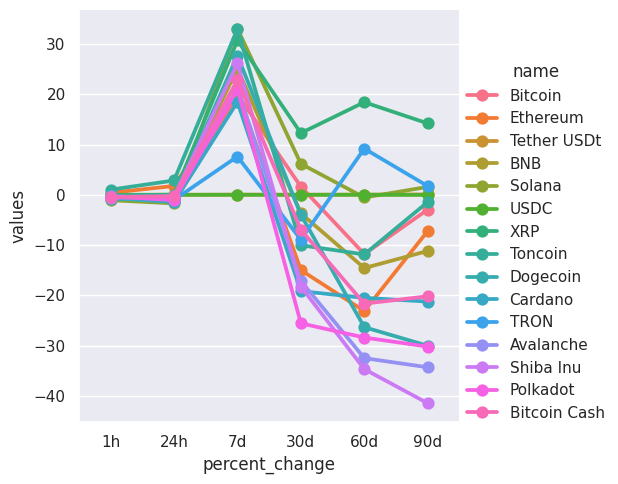

In [121]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [122]:
print(df.columns)


Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')


In [123]:

df10 = df[['name', 'quote.USD.price', 'last_updated']]
#df10 = df10.query("name == 'Bitcoin'")
print(df10)


            name  quote.USD.price              last_updated
0        Bitcoin      59745.19289  2024-08-12T13:00:00.000Z
1       Ethereum       2685.40330  2024-08-12T13:00:00.000Z
2    Tether USDt          1.00045  2024-08-12T13:00:00.000Z
3            BNB        517.04789  2024-08-12T13:00:00.000Z
4         Solana        149.04686  2024-08-12T13:00:00.000Z
5           USDC          1.00008  2024-08-12T13:00:00.000Z
6            XRP          0.57611  2024-08-12T13:01:00.000Z
7        Toncoin          6.61414  2024-08-12T13:00:00.000Z
8       Dogecoin          0.10566  2024-08-12T13:01:00.000Z
9        Cardano          0.34098  2024-08-12T13:00:00.000Z
10          TRON          0.12712  2024-08-12T13:00:00.000Z
11     Avalanche         21.50456  2024-08-12T13:00:00.000Z
12     Shiba Inu          0.00001  2024-08-12T13:00:00.000Z
13      Polkadot          4.63693  2024-08-12T13:00:00.000Z
14  Bitcoin Cash        346.98454  2024-08-12T13:00:00.000Z


<Axes: xlabel='last_updated', ylabel='quote.USD.price'>

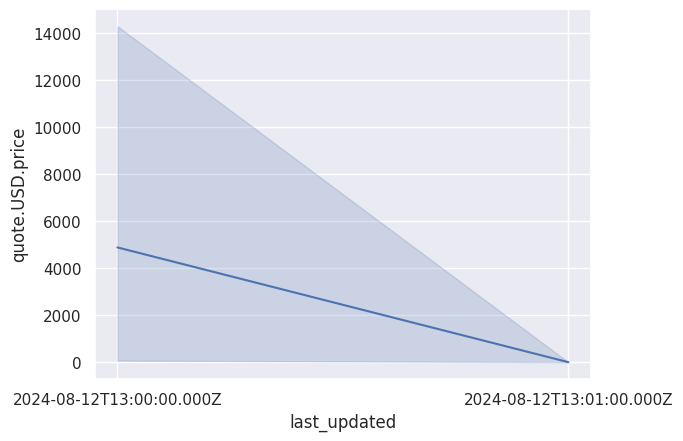

In [124]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='last_updated', y='quote.USD.price', data = df10)

<Axes: >

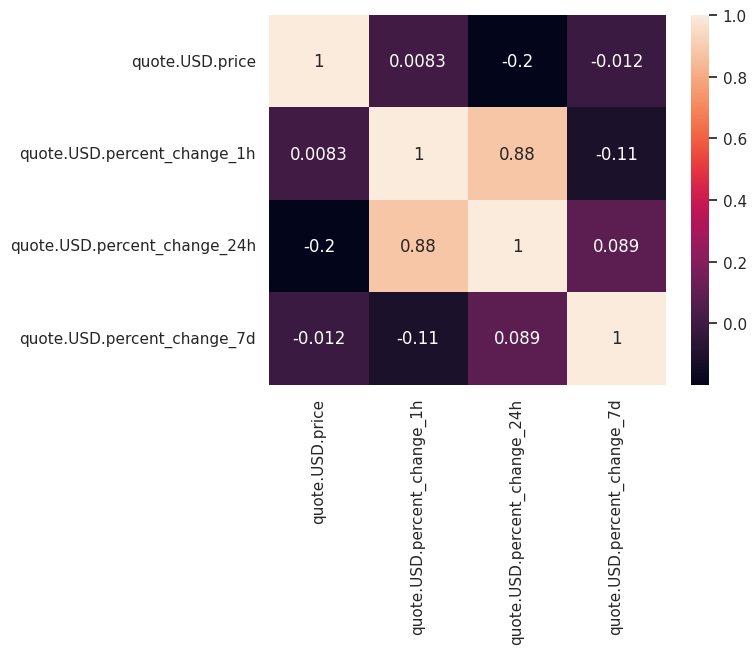

In [125]:
correlation_matrix = df[['quote.USD.price', 'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d']].corr()
sns.heatmap(correlation_matrix, annot=True)


<Axes: xlabel='name', ylabel='volatility'>

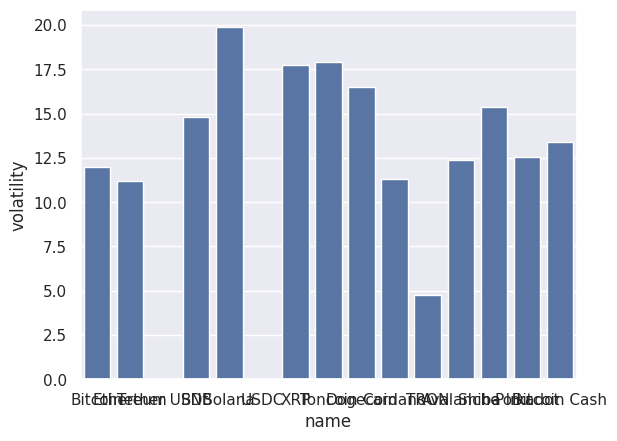

In [126]:
df['volatility'] = df[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d']].std(axis=1)
sns.barplot(x='name', y='volatility', data=df)


In [127]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df10['last_updated'],
                                     open=df10['quote.USD.price'],
                                     high=df10['quote.USD.price'] + 10,
                                     low=df10['quote.USD.price'] - 10,
                                     close=df10['quote.USD.price'])])
fig.show()
